In [11]:
# Imports
# Basics
from __future__ import print_function, division
import pandas as pd 
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

# sklearn

# keras
np.random.seed(13)
from keras.models import Sequential
from keras.layers import Dense, Embedding, Reshape, Activation, SimpleRNN, GRU, LSTM, Convolution1D, MaxPooling1D, Merge, Dropout, Bidirectional
from IPython.display import SVG
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import model_to_dot, plot_model

from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop

from IPython import display
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [51]:
# initialize some variables
grid = np.zeros((10,10))

ship_list = [('carrier', 5), ('battleship', 4), ('sub', 3), ('cruiser', 3), ('destroyer', 2)]

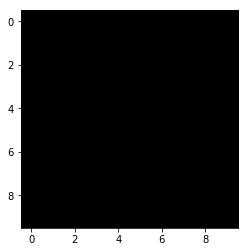

In [23]:
plt.imshow(grid, cmap='gray', interpolation='nearest')

In [137]:
#randomly place the ships on the grid
#grid = np.zeros((10,10))

#ship_list = [('carrier', 5), ('battleship', 4), ('sub', 3), ('cruiser', 3), ('destroyer', 2)]
def place_ships(grid):
    grid = np.zeros((10,10))

    ship_list = [('carrier', 5), ('battleship', 4), ('sub', 3), ('cruiser', 3), ('destroyer', 2)]
    
    for ship in ship_list:
        start_spot = np.random.randint(0,10,2)
        test = 0
        #start_spot = [1,2]
        direction = np.random.randint(0,4) #if direction = 0 down, if direction = 1 up, if direction = 2 left , 3 right
        #direction = 0
        if direction == 0:
            if start_spot[0] + ship[1]-1 < 10:
                for i in range(ship[1]):
                    if grid[start_spot[0] + i][start_spot[1]] == 1:
                        test = 1
                        
                if test == 0:   
                    for i in range(ship[1]):
                        grid[start_spot[0] + i][start_spot[1]] = 1
                else:
                    ship_list.append(ship)
            else:
                ship_list.append(ship)
                    
                    
        elif direction == 1:
            if start_spot[0] - ship[1] + 1 > 0:
                for i in range(ship[1]):
                    if grid[start_spot[0] - i][start_spot[1]] == 1:
                        test = 1
                        
                if test == 0:   
                    for i in range(ship[1]):
                        grid[start_spot[0] - i][start_spot[1]] = 1
                else:
                    ship_list.append(ship)
            else:
                ship_list.append(ship)
                    
                    
        elif direction == 2:
            if start_spot[1] - ship[1] + 1 > 0:
                for i in range(ship[1]):
                    if grid[start_spot[0]][start_spot[1] - i] == 1:
                        test = 1
                        
                if test == 0:   
                    for i in range(ship[1]):
                        grid[start_spot[0]][start_spot[1] - i] = 1
                else:
                    ship_list.append(ship)
                                       
            else:
                ship_list.append(ship)

        
        elif direction == 3:
            if start_spot[1] + ship[1] - 1  < 10:
                for i in range(ship[1]):
                    if grid[start_spot[0]][start_spot[1] + i] == 1:
                        test = 1
                        
                if test == 0:   
                    for i in range(ship[1]):
                        grid[start_spot[0]][start_spot[1] + i] = 1
                else:
                    ship_list.append(ship)
                        
            else:
                ship_list.append(ship)
        
        print(ship_list)
    return grid
    

In [129]:
grid = np.zeros((10,10))

In [142]:
grid = place_ships(grid)

[('carrier', 5), ('battleship', 4), ('sub', 3), ('cruiser', 3), ('destroyer', 2), ('carrier', 5)]
[('carrier', 5), ('battleship', 4), ('sub', 3), ('cruiser', 3), ('destroyer', 2), ('carrier', 5), ('battleship', 4)]
[('carrier', 5), ('battleship', 4), ('sub', 3), ('cruiser', 3), ('destroyer', 2), ('carrier', 5), ('battleship', 4)]
[('carrier', 5), ('battleship', 4), ('sub', 3), ('cruiser', 3), ('destroyer', 2), ('carrier', 5), ('battleship', 4)]
[('carrier', 5), ('battleship', 4), ('sub', 3), ('cruiser', 3), ('destroyer', 2), ('carrier', 5), ('battleship', 4)]
[('carrier', 5), ('battleship', 4), ('sub', 3), ('cruiser', 3), ('destroyer', 2), ('carrier', 5), ('battleship', 4)]
[('carrier', 5), ('battleship', 4), ('sub', 3), ('cruiser', 3), ('destroyer', 2), ('carrier', 5), ('battleship', 4), ('battleship', 4)]
[('carrier', 5), ('battleship', 4), ('sub', 3), ('cruiser', 3), ('destroyer', 2), ('carrier', 5), ('battleship', 4), ('battleship', 4)]


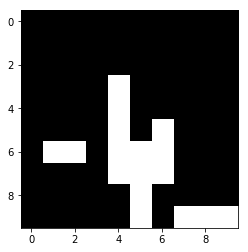

In [143]:
plt.imshow(grid, cmap='gray', interpolation='nearest')